# Data Source

## !kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization, Dropout, MaxPooling2D, Flatten

In [3]:
#Importing the dataset

In [4]:
test_ds = keras.utils.image_dataset_from_directory(directory = 'D:/Download_Dup/archive (3)/brain_tumor/test',
                                             labels = 'inferred', label_mode = 'int',
                                             batch_size = 32,image_size = (158,158))
train_ds = keras.utils.image_dataset_from_directory(directory = 'D:/Download_Dup/archive (3)/brain_tumor/train',
                                                    labels = 'inferred', label_mode = 'int',
                                                     batch_size = 32, image_size = (158,158))

Found 64 files belonging to 2 classes.
Found 189 files belonging to 2 classes.


## Test Images

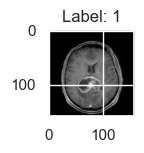

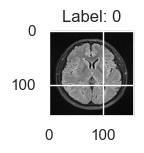

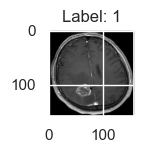

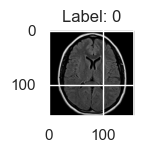

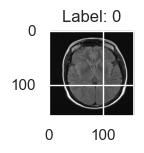

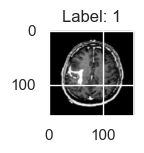

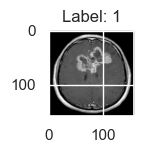

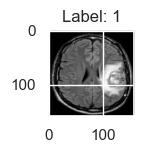

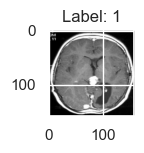

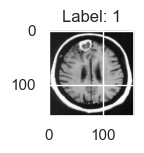

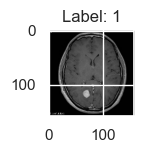

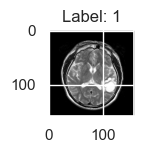

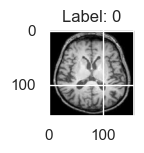

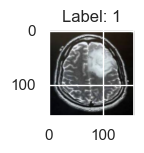

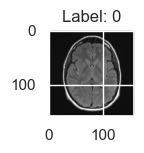

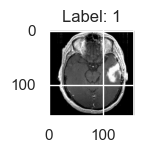

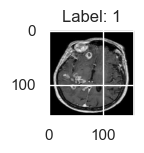

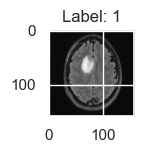

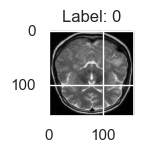

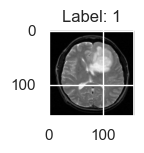

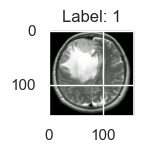

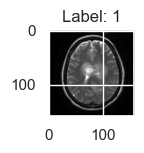

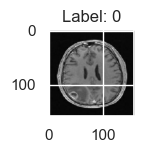

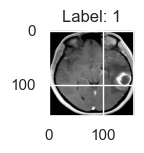

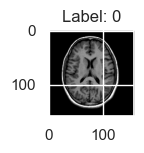

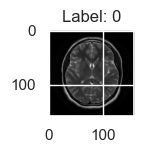

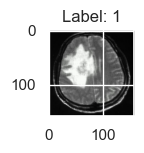

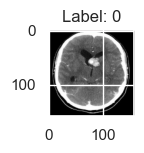

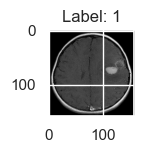

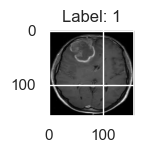

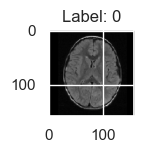

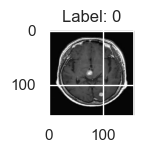

In [61]:
batched_dataset = test_ds
for batch_images, batch_labels in batched_dataset:
    image_array = batch_images.numpy()
    label_array = batch_labels.numpy()
    
for i in range(image_array.shape[0]):

    img = image_array[i]

        # Convert the image array back to an image
    show = keras.preprocessing.image.array_to_img(img)
    plt.subplot(3,5, 2)
    # Display the image using Matplotlib
    plt.imshow(show, cmap=plt.cm.binary)
    plt.title(f"Label: {label_array[i]}")
    plt.show()

In [ ]:
#Scaling the data

In [13]:
def scaling(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

In [14]:
train_ds = train_ds.map(scaling)
test_ds = test_ds.map(scaling)

In [15]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 158, 158, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Train the model

## VGG16

In [17]:
from keras.applications.vgg16 import VGG16

In [19]:
cnn_model = VGG16(include_top = False,weights = 'imagenet',input_shape = (158,158,3))

58889256/58889256 [==============================] - 6s 0us/step


In [21]:
cnn_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 158, 158, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 158, 158, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 158, 158, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 79, 79, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 79, 79, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 79, 79, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 39, 39, 128)       0     

In [23]:
model = Sequential()
model.add(cnn_model)

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1048704   
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15763521 (60.13 MB)
Trainable params: 15763521 (60.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer = 'adam',metrics = ['accuracy'], loss = 'binary_crossentropy')
model.fit(train_ds,batch_size = 64,epochs = 10, validation_data = test_ds)

Epoch 1/10
6/6 [==============================] - 66s 11s/step - loss: 2.1912 - accuracy: 0.5079 - val_loss: 0.7119 - val_accuracy: 0.3438
Epoch 2/10
6/6 [==============================] - 71s 12s/step - loss: 0.7499 - accuracy: 0.4921 - val_loss: 0.6987 - val_accuracy: 0.4219
Epoch 3/10
6/6 [==============================] - 77s 13s/step - loss: 0.6708 - accuracy: 0.5979 - val_loss: 0.6700 - val_accuracy: 0.6094
Epoch 4/10
6/6 [==============================] - 84s 14s/step - loss: 0.6580 - accuracy: 0.6296 - val_loss: 0.6629 - val_accuracy: 0.6094
Epoch 5/10
6/6 [==============================] - 89s 15s/step - loss: 0.6221 - accuracy: 0.6349 - val_loss: 0.6384 - val_accuracy: 0.6719
Epoch 6/10
6/6 [==============================] - 91s 15s/step - loss: 0.6189 - accuracy: 0.7196 - val_loss: 0.7588 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 94s 16s/step - loss: 0.5512 - accuracy: 0.7513 - val_loss: 0.6003 - val_accuracy: 0.6719
Epoch 8/10
6/6 [===========

## Testing Model
#### Test 1

In [63]:
import cv2

In [65]:
test_img = cv2.imread("D:/Download_Dup/archive (3)/brain_tumor/test/no/no 99.jpg")

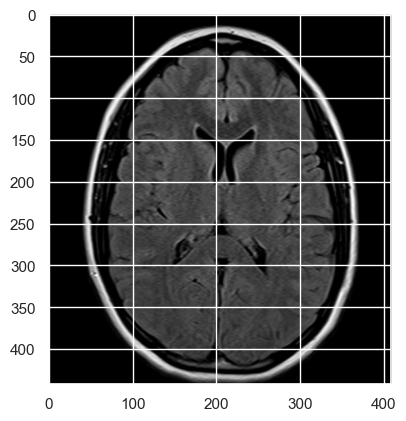

In [66]:
plt.imshow(test_img)

In [36]:
test_img.shape

(442, 409, 3)

In [39]:
test_img = cv2.resize(test_img, (158,158))

In [40]:
test_img.shape

(158, 158, 3)

In [41]:
test_input = test_img.reshape(1,158,158,3)

In [42]:
model.predict(test_input)

1/1 [==============================] - 0s 267ms/step


array([[1.]], dtype=float32)

### 0 -- no
### 1 -- yes

## Test 2

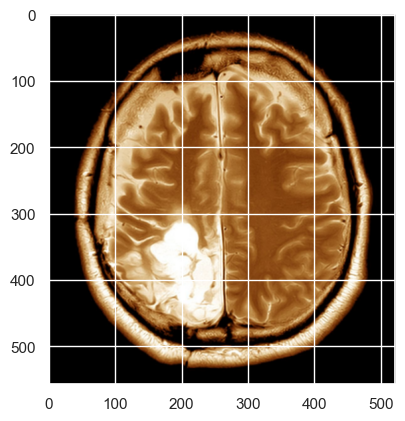

In [64]:
plt.imshow(cv2.imread("D:/Download_Dup/Screenshot 2023-09-05 151504.png"))

In [47]:
test_img = cv2.imread("D:/Download_Dup/Screenshot 2023-09-05 151504.png")
test_img = cv2.resize(test_img, (158,158))
test_input = test_img.reshape(1,158,158,3)
model.predict(test_input)

1/1 [==============================] - 0s 104ms/step


array([[0.9992449]], dtype=float32)

### 0 -- no
### 1 -- yes